In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D

In [175]:
def plot_mean_and_std(dfs, lambdas, col="diverted", ytitle="Media", unit="planes", scale=0):
    x = []
    y_mean = []
    y_std = []

    for i, df in enumerate(dfs):
        x.append(lambdas[i])
        y_mean.append(df[col].mean())
        y_std.append(df[col].std())

    # --- Gráfico ---
    plt.plot(x, y_mean, linestyle="-", color="dodgerblue")
    plt.errorbar(x, y_mean, yerr=y_std, fmt="none", ecolor="navy", capsize=4)
    plt.scatter(x, y_mean, color="navy", zorder=3)

    plt.xlabel("λ")
    plt.ylabel(ytitle)

    # --- Crear entradas personalizadas para la leyenda ---
    legend_entries = [
        Line2D([0], [0], color="none", label=f"Error para λ={lam}: {err:.3f}")
        for lam, err in zip(lambdas, y_std)
    ]
    plt.legend(handles=legend_entries, title=f"Desvíos estándar (en {unit})", loc="best")

    # --- Escala del eje Y ---
    if scale == 1:
        plt.ylim(0, 10)

    plt.tight_layout()
    plt.show()


In [176]:
data = {}
with open("exercise_6_results.pkl", "rb") as f:
    data = pickle.load(f)
dfs = [pd.DataFrame(data[i]["numeric_results"]) for i in range(len(data))]
lambdas = [0.02, 0.1, 0.2, 0.5, 1]
dts = [pd.DataFrame(data[i]["simulation_stats"]) for i in range(len(data))]

In [177]:
for i in range(len(dfs)):
    dfs[i]["reposition_prop"] = dfs[i]["reposition_count"] / dfs[i]["total_planes"]
    dfs[i]["landed_prop"] = dfs[i]["landed"] / dfs[i]["total_planes"]
    dfs[i]["diverted_prop"] = dfs[i]["diverted"] / dfs[i]["total_planes"]

In [178]:
for i in range(len(dts)):
    dts[i]["mean_delay_all"] = dts[i]["mean_flight_time_all"] - 23
    dts[i]["mean_delay_landed"] = dts[i]["mean_flight_time_landed"] - 23

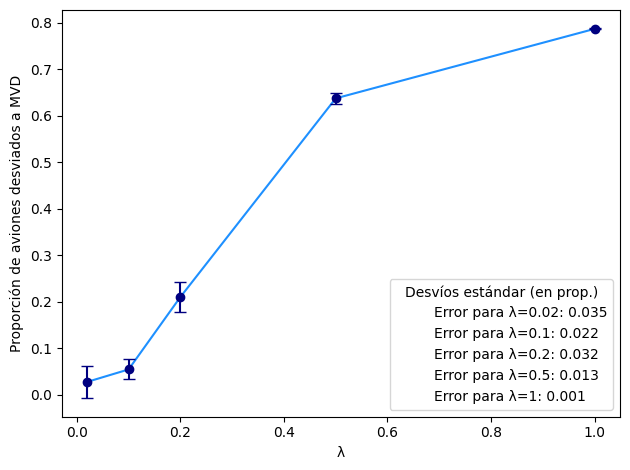

In [179]:
plot_mean_and_std(dfs, lambdas, "diverted_prop", "Proporción de aviones desviados a MVD", "prop.")

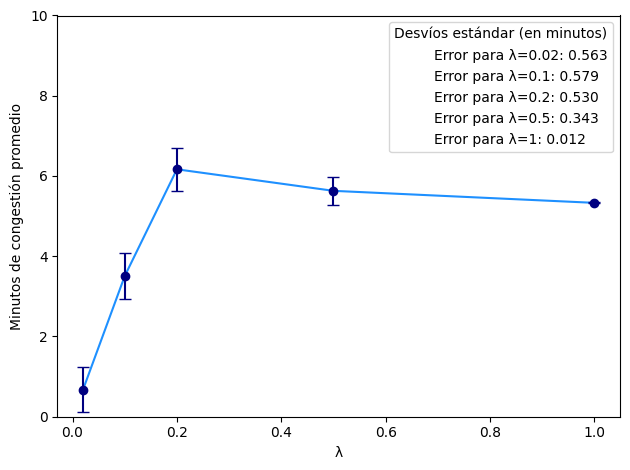

In [180]:
plot_mean_and_std(dts, lambdas, "mean_congestion_landed", "Minutos de congestión promedio", unit="minutos", scale=1)

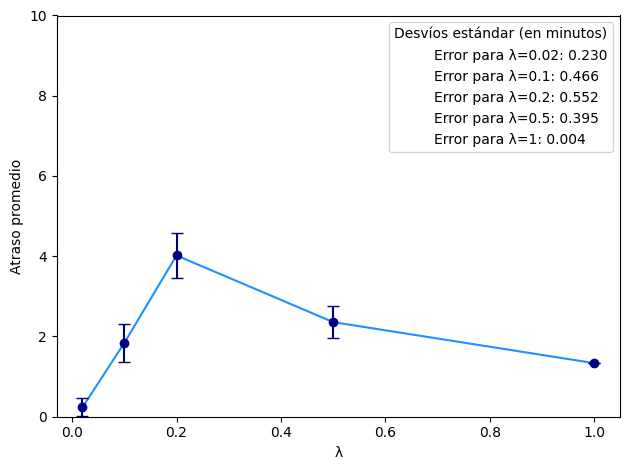

In [181]:
plot_mean_and_std(dts, lambdas, "mean_delay_landed", "Atraso promedio", unit="minutos", scale=1)

### Figuras para ejercicio 7

In [182]:
baseline = pd.read_pickle("exercise_7_baseline.pkl")
a = pd.read_pickle("exercise_7_new_buffers.pkl")
b = pd.read_pickle("exercise_7_new_speed_adjust.pkl")
c = pd.read_pickle("exercise_7_all_combined.pkl")
d = pd.read_pickle("exercise_7_new_buffer_measurements.pkl")

In [183]:
dicts = [baseline, a, b, c, d]
nums = [dicts[i]["numeric_results"] for i in range(len(dicts))]
plane_stats = [pd.DataFrame(dicts[i]["simulation_stats"]) for i in range(len(dicts))]

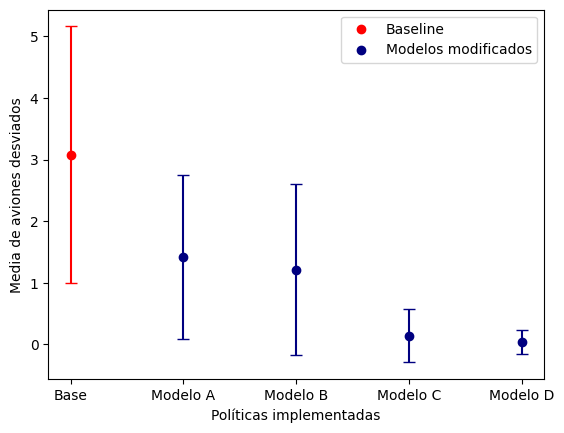

In [184]:
x = ["Base", "Modelo A", "Modelo B", "Modelo C", "Modelo D"]
y_mean = [nums[i]["diverted"].mean() for i in range(len(nums))]
y_std = [nums[i]["diverted"].std() for i in range(len(nums))]


# Dibujar baseline con otro color
plt.scatter(x[0], y_mean[0], color="red", label="Baseline")
plt.errorbar(x[0], y_mean[0], yerr=y_std[0], fmt="none", ecolor="red", capsize=4)

# Dibujar el resto
plt.scatter(x[1:], y_mean[1:], color="navy", label="Modelos modificados")
# Dibujar todas las barras de error iguales
plt.errorbar(x[1:], y_mean[1:], yerr=y_std[1:], fmt="none", ecolor="navy", capsize=4)

plt.xlabel("Políticas implementadas")
plt.ylabel("Media de aviones desviados")
plt.legend()
plt.show()


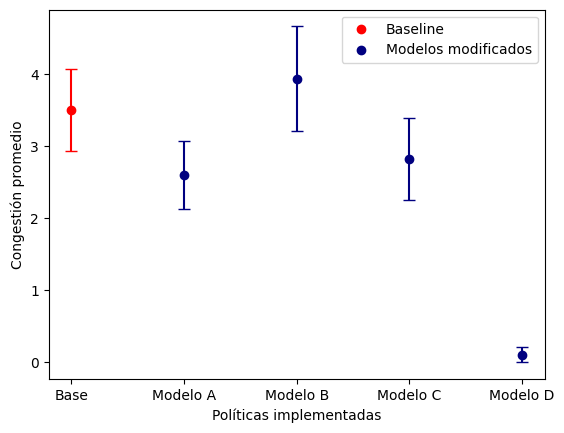

In [185]:
x = ["Base", "Modelo A", "Modelo B", "Modelo C", "Modelo D"]
y_mean = [plane_stats[i]["mean_congestion_landed"].mean() for i in range(len(nums))]
y_std = [plane_stats[i]["mean_congestion_landed"].std() for i in range(len(nums))]


# Dibujar baseline con otro color
plt.scatter(x[0], y_mean[0], color="red", label="Baseline")
plt.errorbar(x[0], y_mean[0], yerr=y_std[0], fmt="none", ecolor="red", capsize=4)

# Dibujar el resto
plt.scatter(x[1:], y_mean[1:], color="navy", label="Modelos modificados")
# Dibujar todas las barras de error iguales
plt.errorbar(x[1:], y_mean[1:], yerr=y_std[1:], fmt="none", ecolor="navy", capsize=4)

plt.xlabel("Políticas implementadas")
plt.ylabel("Congestión promedio")
plt.legend(loc="upper right")
plt.show()

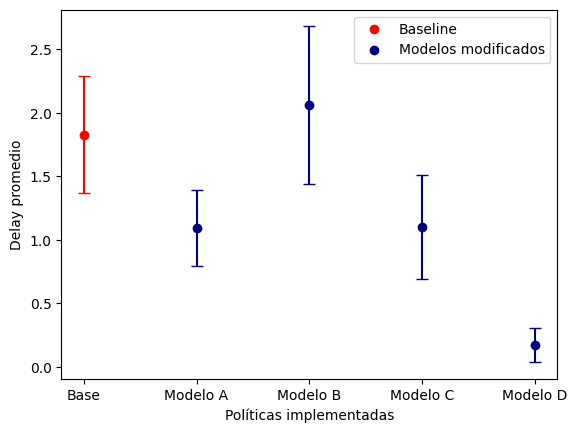

In [186]:
x = ["Base", "Modelo A", "Modelo B", "Modelo C", "Modelo D"]
y_mean = [plane_stats[i]["mean_delay_landed"].mean() for i in range(len(nums))]
y_std = [plane_stats[i]["mean_delay_landed"].std() for i in range(len(nums))]


# Dibujar baseline con otro color
plt.scatter(x[0], y_mean[0], color="red", label="Baseline")
plt.errorbar(x[0], y_mean[0], yerr=y_std[0], fmt="none", ecolor="red", capsize=4)

# Dibujar el resto
plt.scatter(x[1:], y_mean[1:], color="navy", label="Modelos modificados")
# Dibujar todas las barras de error iguales
plt.errorbar(x[1:], y_mean[1:], yerr=y_std[1:], fmt="none", ecolor="navy", capsize=4)

plt.xlabel("Políticas implementadas")
plt.ylabel("Delay promedio")
plt.legend()
plt.show()